# 10장 까지는 전처리 과정을 다루었고
# 11장, 12장은 13장부터 회귀/분류 모델들을 다루기 전에
# 전반적인 모델 평가 방법과 최적 모델 및 하이퍼 파라미터 튜닝 방법을 소개

# 11장. 모델 평가

### 실전에 적용하기 전에 주어진 데이터를 가지고 '만든 모델'의 성능을 평가하는 방법을 설명

## 11.1 교차검증 모델

##### 교차 검증 배경 : 고정된 test set을 통해 모델의 성능을 검증하고 수정하는 과정을 반복하면, 결국 내가 만든 모델은 test set 에만 잘 동작하는 모델이 된다.
→ test set에 과적합(overfitting)

In [ ]:
# 라이브러리를 임포트합니다.
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

### sklearn에서 제공되는 데이터 셋...그냥 확인만...
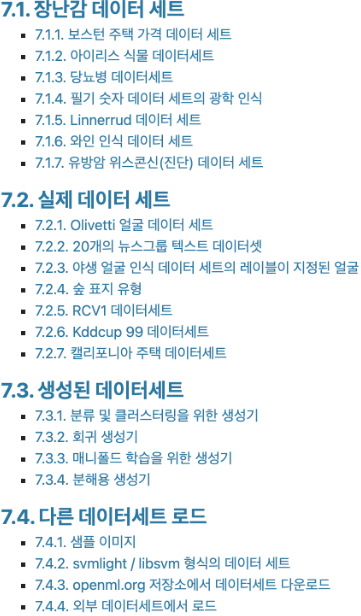

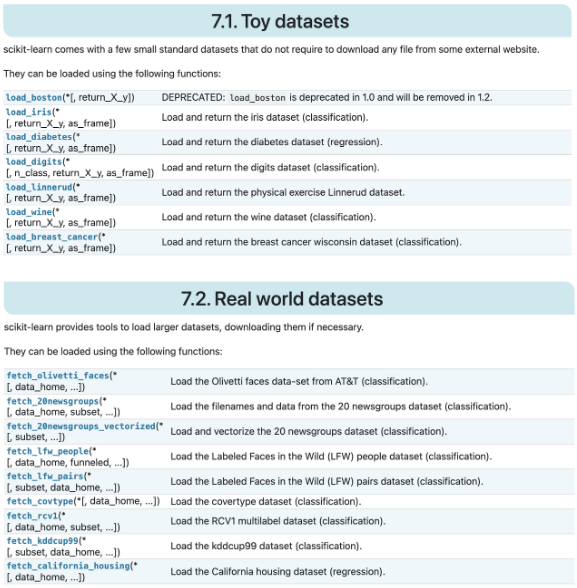

### Toy Dataset 자료구조, sklearn.utils.Bunch라는 자료구조 반환, Bunch클래스는 key-value 형식, dict와 유사
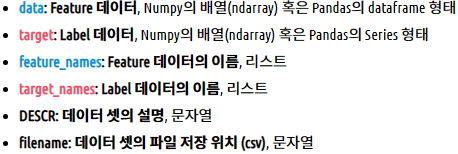

--------------------------------------------------------------------------------

### 모델 검증은
#### 이전에 본 적이 없는 데이터에서
#### 모델이
#### 얼마나 좋은 예측을 하는지를 확인하는 과정

###### *검증(Validation) or Hold-out : 데이터 일부를 테스트용으로 떼어놓는 것

--------------------------------------------------------------------------------

#### 간단하게 검증을 한다면<br>
#### Training set와 Test set을 나누고<br>
#### Training set의 feature와 label로 모델 훈련<br>
#### 훈련한 모델을 Test set으로 평가<br>
#### 하는 방법을 고려할 수 있으나<br>
#### <br>
#### 위 방법은 다음과 같은 문제를 포함<br>
#### → 모델 성능은 테스트 세트로 나뉜 일부 샘플에 의해 결정<br>
#### → 전체 가용 데이터를 사용하여 훈련하고 테스트하지 못함<br>

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

#### 위 단점을 극복하기 위해 k-폴드 교차검증(k-fold cross-validation, KFCV)이 대안 중에 하나<br>
#### k-폴드 교차검증 방법<br>
#### ① 데이터를 k개의 부분(폴드)로 나누고<br>
#### ② k-1개 폴드를 Training set으로<br>
#### ③ 남은 1개 Test set으로 사용<br>
#### ④ 각각의 k개 폴드를 Test set으로 사용하여 k번 반복하여 검증 진행<br>
#### ⑤ k번 반복하여 얻은 모델 성을을 평균하여 최종 성능 산출<br>

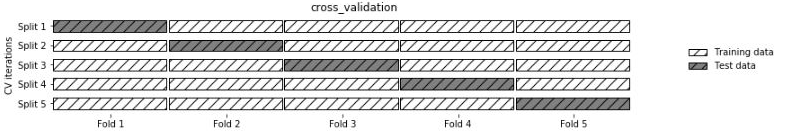

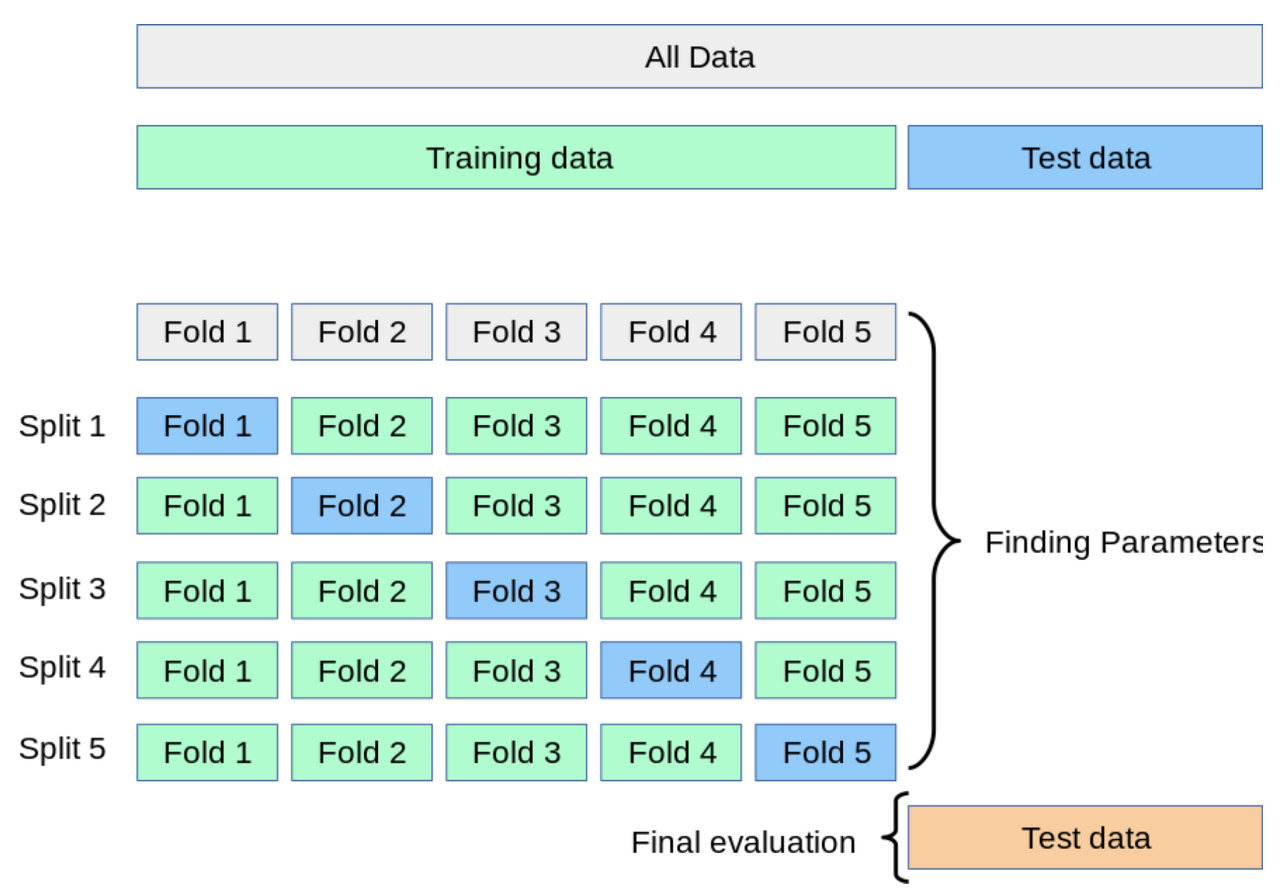

보통 회귀 모델에서 사용한다는데... 이유는? 데이터의 비율, 순서가 중요하지 않기 때문...

--------------------------------------------------------------------------------

#### k폴드 교차 검증 실습

In [ ]:
# 숫자 데이터셋을 로드합니다.
digits = datasets.load_digits()                                                 # 필기 숫자 데이터셋

# 특성 행렬을 만듭니다.
features = digits.data                                                          # Feature 데이터

# 타깃 벡터를 만듭니다.
target = digits.target                                                          # Label 데이터

# 표준화 객체를 만듭니다.
standardizer = StandardScaler()                                                 #

# 로지스틱 회귀 객체를 만듭니다.
logit = LogisticRegression()

# 표준화한 다음 로지스틱 회귀를 실행하는 파이프라인을 만듭니다.
pipeline = make_pipeline(standardizer, logit)

# k-폴드 교차검증을 만듭니다.
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# k-폴드 교차검증을 수행합니다.
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=kf, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용

# 평균을 계산합니다.
cv_results.mean()

0.9693916821849783

In [ ]:
# feature는 np.array 형태이어야 함
type(features)

numpy.ndarray

In [ ]:
# 10개 폴드의 점수를 모두 확인하기
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

### ※ 1. 기본적인 스케일러 종류 : 전처리 과정, 다른 단위를 가졌거나 데이터 값이 들쑥날쑥할 경우
- StandardScaler : 표준화(평균 0, 분산 1)
- MinMaxScaler : 정규화, 모든 값이 0~1사이에 존재, 정규화 방법 중 원데이터 분포 유지하며 정규화
- RoburstScalar : 중간값(median)과 사분위값을 사용,  (X - Q2) / (Q3-Q1), 이상치에 강하게 만들 수...
- Normalizer : 특성벡터의 모든 길이가 1이 되도록 조정, 특성벡터의 길이는 상관없고 데이터의 방향이나 각도가 중요할 경우 사용

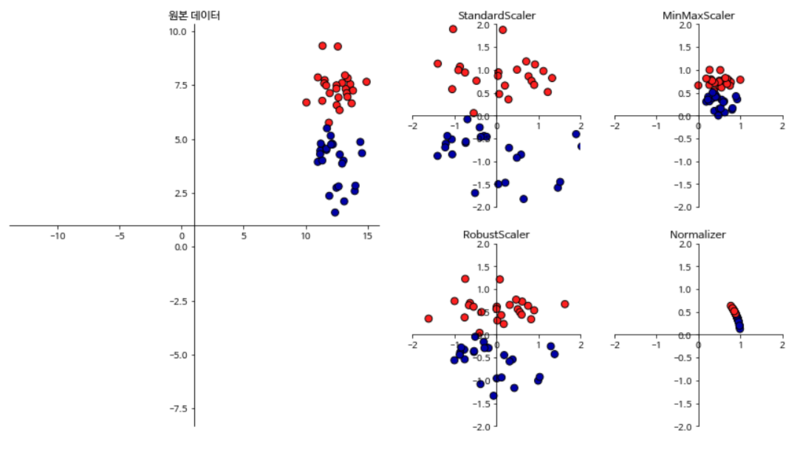

###### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 이외 QuantileTransformer(기본적으로 1000개의 분위 사용하여 데이터를 균등분포, Robust처럼 이상치에 민감, 0~1사이로 압축), <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; PowerTransformer(데이터의 특성별로 정규분포형태에 가깝도록 변환)<br>
있다는 것만 아시고 넘어갑니다...

--------------------------------------------------------------------------------

k폴드 교차 검증 기본 조건
1. 각 샘플이 다른 샘플과 독립적으로 생성되었다고 가정 = Independnant Identically Distributed
2. 각 타킷 클래스의 샘플이 거의 같은 비율로 폴드에 담기는 것이 좋음 = 계층별 k-폴드, stratified k-fold
<br>ex. 각 폴드 80% 남성, 20% 여성 샘플 통일
3. 검증 세트나 교차검증을 사용할 때 훈련 세트에서 데이터를 전처리하고  이 변환을 훈련 세트와 테스트 세트에 모두 적용
<br>ex.표준화 standarzier의 fit 메서드로 훈련 세트 평균 분산 계산하여 transform 메서드로 훈련 세트와 테스트 세트에 모두 적용

In [ ]:
# 라이브러리를 임포트합니다.
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)                            # train_test_split 추가 설명

# 훈련 세트로 standardizer의 fit 메서드를 호출합니다.
standardizer.fit(features_train)                                                # fit 설명

# 훈련 세트 기준의 분포를 훈련 세트와 테스트 세트에 모두 적용합니다.
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

--------------------------------------------------------------------------------

#### ※ train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)<br>
(1) Parameter

- arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)

- test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)

- train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)

- random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력)

- shuffle : 셔플여부설정 (default = True)

- stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.

​

(2) Return

- X_train, X_test, Y_train, Y_test : arrays에 데이터와 레이블을 둘 다 넣었을 경우의 반환이며, 데이터와 레이블의 순서쌍은 유지된다.

- X_train, X_test : arrays에 레이블 없이 데이터만 넣었을 경우의 반환<br>

[출처] [Python] sklearn의 train_test_split() 사용법|작성자 Paris Lee

### 잠깐만 train_test_split 예시를 보면...

In [ ]:
import numpy as np
X, y = np.arange(10).reshape((5,2)),range(5)
print("X=", X)
print("y=",list(y))

X= [[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
y= [0, 1, 2, 3, 4]


##### random_state 예시

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train)

[[4 5]
 [0 1]
 [6 7]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train)

[[4 5]
 [0 1]
 [6 7]]


##### stratify 예시

In [ ]:
import pandas as pd
class_df = pd.DataFrame({'class_id' : ['A','A','A','A','A','A','B','B','B'], 'feature' : [1,2,3,4,5,6,7,8,9]})
class_df

,class_id,feature
0,A,1
1,A,2
2,A,3
3,A,4
4,A,5
5,A,6
6,B,7
7,B,8
8,B,9


In [ ]:
train_df, val_df = train_test_split(class_df, test_size = 0.2, random_state=2)
print('train_df\n', train_df['class_id'].value_counts())
print('val_df\n', val_df['class_id'].value_counts())

train_df
 A    4
B    3
Name: class_id, dtype: int64
val_df
 A    2
Name: class_id, dtype: int64


valid 데이터에 test_size 비율이 적용되지 않음

In [ ]:
train_df, val_df = train_test_split(class_df, test_size = 0.2, stratify =  class_df['class_id'],random_state=2)
print('train_df\n', train_df['class_id'].value_counts())
print('val_df\n', val_df['class_id'].value_counts())

train_df
 A    5
B    2
Name: class_id, dtype: int64
val_df
 B    1
A    1
Name: class_id, dtype: int64


## stratify는 train set과 validation set에 데이터 분포 비율까지 맞춰줌

--------------------------------------------------------------------------------

#### ※ fit, transform, fit_transform 비교<br>
- fit() : ① 데이터 학습시키는 메서드, 머신러닝이 데이터에 머신러닝 모델을 맞추는 것<br>
     ② 뭔가를 적용하라. StandardScaler.fit() → 평균과 표준편차를 계산하라
- transform() : ① 실제로 학습시킨 것을 적용하는 메서드<br>
② fit을 기준으로 얻은 mean, variance에 맞춰서 변형하는 것, StandardScaler.transform() → fit에 따라 표준화하라
- fit_transform() : 위 두 개를 합쳐놓은 것

★ train_set에 fit, transform을 해야하지만, test_set에는 transform만 적용해야 함<br>
→ test set에도 fit 해버리면 scaler가 기존에 학습 데이터에 fit 한 기준을 다 무시하고 새로운 데이터로 mean, variance 계산하여 테스트 데이터까지 학습해버림<br>
fit된 분포를 그대로 적용해야 함<br>
<br>
test set과 train set을 완전히 고립시키기 위해서...<br>
train set에 test set 영향을 주지않기 위해서...

--------------------------------------------------------------------------------

In [ ]:
# 8번 line 에 이어서...
# 파이프라인을 만듭니다.
pipeline = make_pipeline(standardizer, logit)

### ※ sklearn의 pipeline 패키지
#### 일반적으로 데이터 전처리에서 학습까지의 과정을 연결시키주는 것

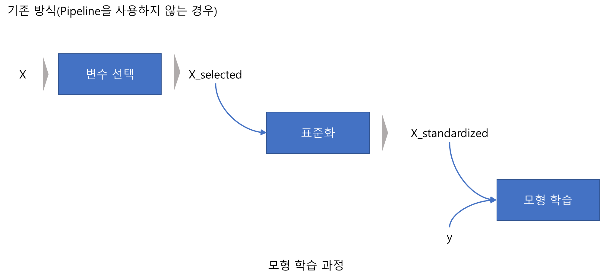

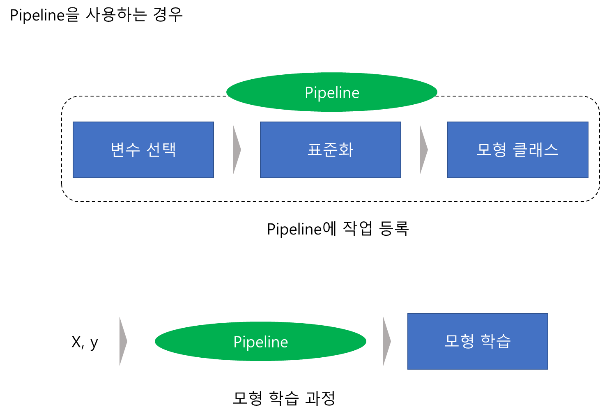

### 예시
vect = CountVectorizer()<br>
tfidf = TfidfTransformer()<br>
clf = LinearSVC()<br>
<br>
pipeline = Pipeline([<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ('vect',vect),<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    ('tfidf',tfidf),<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    ('clf',clf)<br>
])<br>

--------------------------------------------------------------------------------

In [ ]:
# k-폴드 교차 검증 수행
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=kf, # 교차검증
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용

#
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

### ※ cross_val_score : 교차 검증을 간편하게 만든 sklearn의 교차검증 API
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; from sklearn.model_selection import cross_val_score
### 사용법
### sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
#### - estimator : classifier 모델 or regression 모델 <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(단, regression model일 경우 KFold, classifier 모델일 경우 Stratified KFold 자동 적용)
#### - X : feature dataset
#### - y : label dataset
#### - scoring : 평가 지표 (구체적인 내용은 뒤에서..., accruracy, f1-score 등...)
#### - n_jobs : 병렬처리 갯수(코어 개수), None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
#### - verbose : 수행 중 정보 출력 (0: 출력없음, 1: 자세히, 2: 함축적인 정보)
#### - fit_params : dict 형식, estimator의 fit 메서드에 전달할 매개 변수 (estimator에서 선언되는 경우가 많은가? 그래서 잘 안쓰는 것 같음)
#### - pre_dispatch : 병렬 실행 중에 전달되는 작업 수를 제어. 이 숫자를 줄이는 것은 CPU가 처리할 수 있는 작업보다 더 많은 작업이 전달될 때 메모리 소비의 폭발을 피하기 위해 유용. int or str, default=’2*n_jobs’
#### - error_score :추정기 학습 중에 오류가 발생한 경우에 할당할 점수 값. 'raise'로 설정하면 오류가 발생하며 예외가 발생. 숫자 값이 주어지면 FitFailedWarning 예외가 발생.


#### - cv :
- cv = Integer : 폴드 개수 조정 (regression 모델에서는 kFold의 k 개수, classifier 모델일 경우 Stratified KFold의 k 개수)
- cv = KFold or other : 교차 검증 방법 선택<br>
ex. kfold, StratifiedKFold, LeaveOneOut(), ShuffleSplit(), RepeatedStratified(), GroupKFold, GroupShuffleSplit, TimeSeriesSplit 등<br>
참고. 설정 값들<br>
-- None: to use the default 5-fold cross validation,<br>
-- int: to specify the number of folds in a (Stratified)KFold,<br>
-- CV: splitter,<br>
-- An iterable that generates (train, test) splits as arrays of indices.<br>

※ KFold, StratifiedKFold의 n_splits 기본 3(sklearn v0.22에서는 5)<br>

교재에 언급된...<br>
참고<br>
모든 통계학자가 교차검증을 알아야만하는 이유 (https://robjhyndman.com/hyndsight/crossvalidation/)<br>
요약 : 다항 회귀에서 높은 차수의 항을 계속 추가하여 데이터를 더 잘 맞출 수 있지만, 다시 새로운 데이터에 대해서는 일반적으로 예측이 나빠진다. 모델 예측 능력 측정시 사용하지 않은 데이터 세트에서 모델을 테스트 해야하는데 충분한 데이터가 없을 경우 일부 데이터를 테스트로 남겨둘 수 없는 경우가 발생하는데 이때 교차 검증이 유용하다. 아무튼 통계적으로 교차검증은 중요하다.


잘못된 교차검증(https://betatim.github.io/posts/cross-validation-gone-wrong/) <br>
요약 : 머신러닝 애플리케이션을 구축할 때 입력 특성을 선택하는 것은 여러 선택 중 하나에 불과합니다. 교차 검증 도중에 모든 결정을 내리도록 기억하세요.<br>
## 이해 제대로 못함...이해하신 분?
### Stratified K-fold할 때마다 상관관계가 큰 변수를 선택해야한다?

## Wrong Way
X,y = make_data(N=2000, n_vars=50000)<br>
select3 = SelectKBest(f_regression, k=20)<br>
X_three = select3.fit_transform(X,y)<br>
clf = GradientBoostingClassifier()<br>
scores = cross_val_score(clf, X_three, y, cv=5, n_jobs=8)


## Right Way
clf = make_pipeline(SelectKBest(f_regression, k=20),
                    GradientBoostingClassifier())<br>
scores = cross_val_score(clf, X, y, cv=5)<br>

# 위 두 방식의 차이가 무엇인지... 모르겠음...

--------------------------------------------------------------------------------

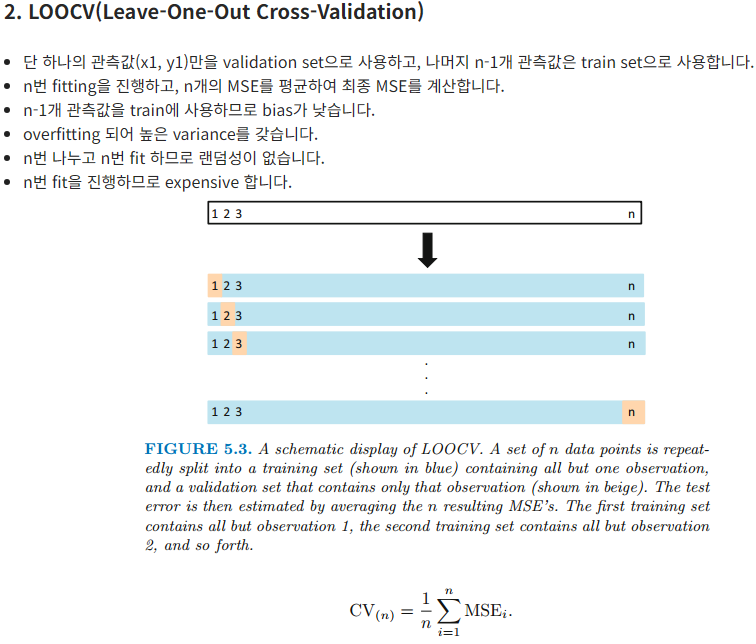##

LOOCV는 폴드 수 k가 샘플 개수와 같다.<br>
from sklearn.model_selection import LeaveOneOut<br>
loo = LeaveOneOut()<br><br>
하지만 LPO를 쓰면 validation set을 P개만큼 사용할 수 있다.<br>
lpo = LeavePOut(p=2)

--------------------------------------------------------------------------------

### 붙임

###class sklearn.model_selection.KFold(n_splits=5, *, shuffle=False, random_state=None)<br>
#### kf = KFold(n_splits=10, shuffle=True, random_state=1)<br>
n_splits : 분할할 세트의 개수, 1세트만 test 데이터로 사용하고 나머지는 train 데이터로 사용

shuffle : True로 설정 시 데이터셋 내의 순서를 섞어서 샘플링, False인 경우 순서대로 분할

random_state : seed 설정, 특정 정수로 지정 시 샘플링 결과 고정

### class sklearn.model_selection.StratifiedKFold(n_splits=5, *, shuffle=False, random_state=None)

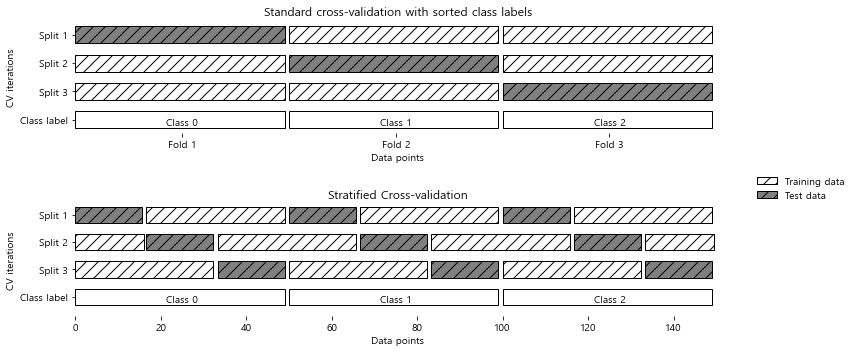

# ★ KFold, StratifedKFold 언제 써야하나?
- 회귀 모델 => cross_validate, cross_val_score => k-겹 교차 검증 (KFold) : 데이터 셋을 나열 순서대로 분류<br>
회귀의 결정값은 이산값 형태의 레이블이 아니라 연속된 숫자값이기 때문에 결정값 별로 분포를 정하는 것은 의미 없음.
- 분류 모델 => cross_validate, cross_val_score => 계층별 k-겹 교차 검증 (StratifiedKFold) : 데이터 셋을 계층적 방식으로 분류<br>
레이블 데이터 왜곡됐을 경우 반드시 적용

--------------------------------------------------------------------------------

### ShuffleSplit : 반복 횟수에 상관없이 훈련 폴드와 테스트 폴드 크기를 임의로 지정,<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 반복 마다 랜덤하게 분할되기 때문에 하나의 샘플이 여러 번 테스트 폴드에 포함될 수 있음<br> cf. StratifiedShuffleSplit

ex. 10개 데이터를 훈련 5개, 테스트 2개로 4번 반복하여 split

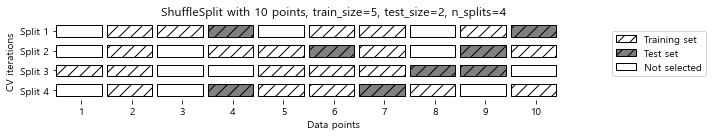

In [ ]:
from sklearn.model_selection import ShuffleSplit

# ShuffleSplit 분할기를 만듭니다.
# 훈련 폴드 50%, 테스트 폴드 20%로 하여 10번 반복
ss = ShuffleSplit(n_splits=10, train_size=0.5, test_size=0.2, random_state=42)

# 교차검증을 수행합니다.
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=ss, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용

# 평균을 계산합니다.
cv_results.mean()

0.9630555555555554

--------------------------------------------------------------------------------

### RepeatedKFold : 데이터 셋의 크기가 크지 않은 경우 교차 검증을 반복하여 안정된 검증 점수를 얻기 위해 적용 가능<br>
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;n_repeats 반복할 때 마다 데이터를 다시 섞음<br>
cf. RepeatedStratifiedKFold

10개 폴드 교차 검증을 5번 반복

In [ ]:
from sklearn.model_selection import RepeatedKFold

# RepeatedKFold 분할기를 만듭니다.
rfk = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

# 교차검증을 수행합니다.
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=rfk, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용

# 검증 점수 개수를 확인합니다.
len(cv_results)

50

n_repeats 기본값 10

--------------------------------------------------------------------------------

### GroupKFold : 데이터 안에 매우 연관된 그룹이 있을 때... 이런 게 있다는 것 소개

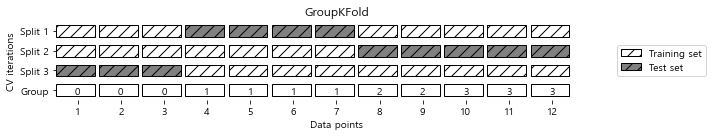

--------------------------------------------------------------------------------

# cf. GridSearchCV : 교차 검증과 최적 하이퍼 파라미터 튜닝을 한번에...다음 챕터에서 소개되는 듯...

&nbsp;

--------------------------------------------------------------------------------

## 11.2 기본 회귀 모델 만들기

보스턴 주택가격 데이터셋이 삭제되어 당뇨병 데이터로 실습

In [ ]:
# 보스턴 주택가격 데이터셋의 특성에는 흑인 인구 비율이 들어 있어 요즘 시대에 적절치 않다는 의견이 많았습니다.
# 사이킷런 1.0 버전에서 load_boston() 함수가 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 이와 관련된 경고를 무시하기 위해 아래 코드를 추가합니다.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 라이브러리를 임포트합니다.
from sklearn.datasets import load_diabetes
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

# 데이터를 로드합니다.
diabetes = load_diabetes()
# 특성을 만듭니다.
features, target = diabetes.data, diabetes.target

In [ ]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
features.shape

(442, 10)

In [ ]:
target.shape

(442,)

In [ ]:
import pandas as pd
data_t = pd.DataFrame(diabetes['data'], columns = diabetes['feature_names'])
data_t.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
# 흔련 세트와 테스트 세트를 나눕니다.
# test_size default 0.25
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=0)

# 더미 회귀 모델을 만듭니다.
dummy = DummyRegressor(strategy='mean')

# 더미 회귀 모델을 훈련합니다.
dummy.fit(features_train, target_train)

# R^2 점수를 계산합니다.
dummy.score(features_test, target_test)

-0.00014359578276068596

### DummyRegressor 간단한 규칙을 사용하여 예측하는 회귀 도구
### 다른 회귀와 비교하기 위한 간단한 기준으로 유용
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html#sklearn-dummy-dummyregressor

예측을 생성하는 데 사용할 Strategy

"mean": 항상 훈련 세트의 평균을 예측<br>
"median": 항상 훈련 세트의 중앙값을 예측<br>
"quantile": 항상 quantile 매개변수와 함께 제공된 훈련 세트의 지정된 quantile을 예측<br>
"상수": 항상 사용자가 제공하는 상수 값을 예측<br>

### 결정계수 R^2 : 독립 변수가 종속 변수를 얼마나 잘 설명하는지 보여주는 지표

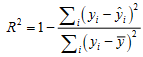

image.png

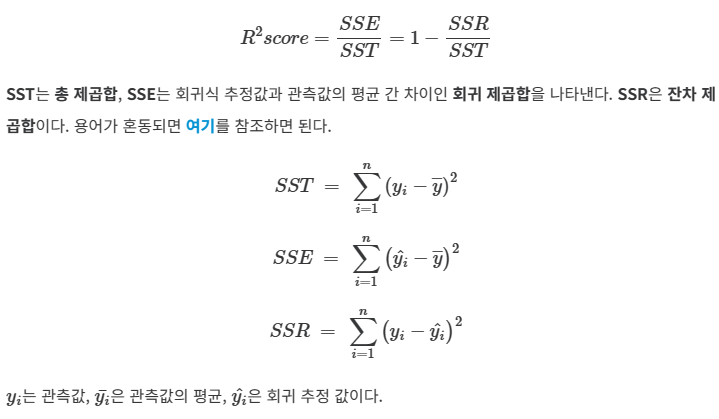

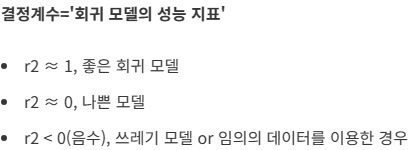

### LinearRegression 모델 적용

In [ ]:
# 라이브러리를 임포트합니다.
from sklearn.linear_model import LinearRegression

# 간단한 선형 회귀 모델을 훈련합니다.
ols = LinearRegression()
ols.fit(features_train, target_train)

# R^2 점수를 계산합니다.
ols.score(features_test, target_test)

0.35940880381777085

→ 35.9% 설명력을 가진다...

### 모든 샘플에 대해 20으로 예측하는 더미 회귀 모델

In [ ]:
# 모든 샘플에 대해 20으로 예측하는 더미 회귀 모델을 만듭니다.
clf = DummyRegressor(strategy='constant', constant=20)
clf.fit(features_train, target_train)

# 점수를 계산합니다.
clf.score(features_test, target_test)

-3.550620469949748

### 붙임

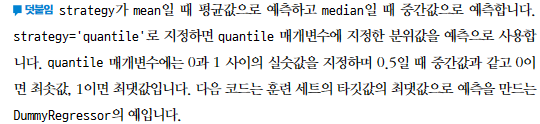

In [ ]:
clf = DummyRegressor(strategy='quantile', quantile=1.0)
clf.fit(features_train, target_train)

# 훈련 세트 타깃의 최대값으로 예측합니다.
clf.predict(features_test)

array([346., 346., 346., 346., 346., 346., 346., 346., 346., 346., 346.,
       346., 346., 346., 346., 346., 346., 346., 346., 346., 346., 346.,
       346., 346., 346., 346., 346., 346., 346., 346., 346., 346., 346.,
       346., 346., 346., 346., 346., 346., 346., 346., 346., 346., 346.,
       346., 346., 346., 346., 346., 346., 346., 346., 346., 346., 346.,
       346., 346., 346., 346., 346., 346., 346., 346., 346., 346., 346.,
       346., 346., 346., 346., 346., 346., 346., 346., 346., 346., 346.,
       346., 346., 346., 346., 346., 346., 346., 346., 346., 346., 346.,
       346., 346., 346., 346., 346., 346., 346., 346., 346., 346., 346.,
       346., 346., 346., 346., 346., 346., 346., 346., 346., 346., 346.,
       346.])

In [ ]:
import numpy as np
# 훈련 세트의 타깃에서 최댓값을 확인합니다.
np.max(target_train)

346.0

--------------------------------------------------------------------------------

## 11.3 기본 분류 모델 만들기

In [ ]:
# 라이브러리를 임포트합니다.
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# 데이터를 로드합니다.
iris = load_iris()

# 타깃 벡터와 특성 행렬을 만듭니다.
features, target = iris.data, iris.target

# 훈련 세트와 테스트 세트로 나눕니다.
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=0)

# 더미 분류 모델을 만듭니다.
dummy = DummyClassifier(strategy='uniform', random_state=1)

# 모델을 훈련합니다.
dummy.fit(features_train, target_train)

# 정확도 점수를 계산합니다.
dummy.score(features_test, target_test)

0.42105263157894735

### DummyClassifier : 간단한 규칙을 사용하여 예측하는 분류기<br>
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html#sklearn-dummy-dummyclassifier<br>
strategy{“stratified”, “most_frequent”, “prior”, “uniform”, “constant”}, default=”prior”<br>
<br>
"stratified": 훈련 세트의 클래스 분포를 존중하여 예측을 생성<br>
"most_frequent": 항상 훈련 세트에서 가장 빈번한 레이블을 예측<br>
"prior": 항상 클래스 사전을 최대화하는 클래스를 예측하고(예: "most_frequent") predict_proba 는 사전 클래스를 반환<br>
"균일": 무작위로 균일하게 예측을 생성<br>
"constant": 항상 사용자가 제공하는 상수 레이블을 예측, 이는 다수가 아닌 클래스를 평가하는 메트릭에 유용<br>

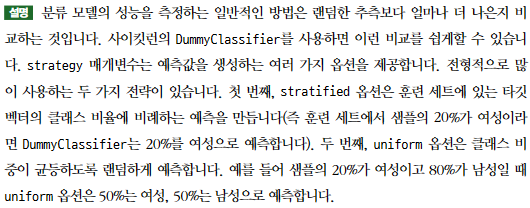

### RandomForest 분류기 적용

In [ ]:
# 라이브러리를 임포트합니다.
from sklearn.ensemble import RandomForestClassifier

# 분류 모델을 만듭니다.
classifier = RandomForestClassifier()

# 모델을 훈련합니다.
classifier.fit(features_train, target_train)

# 정확도 점수를 계산합니다.
classifier.score(features_test, target_test)

0.9736842105263158

### RandomForestClassifer는 14장에서 다룰 예정이므로 개념만 간단히...
훈련을 통해 구성해놓은 다수의 의사결정 나무(Decision Tree)로부터 분류 결과를 취합해서 결론을 얻는 일종의 인기 투표 같은 것


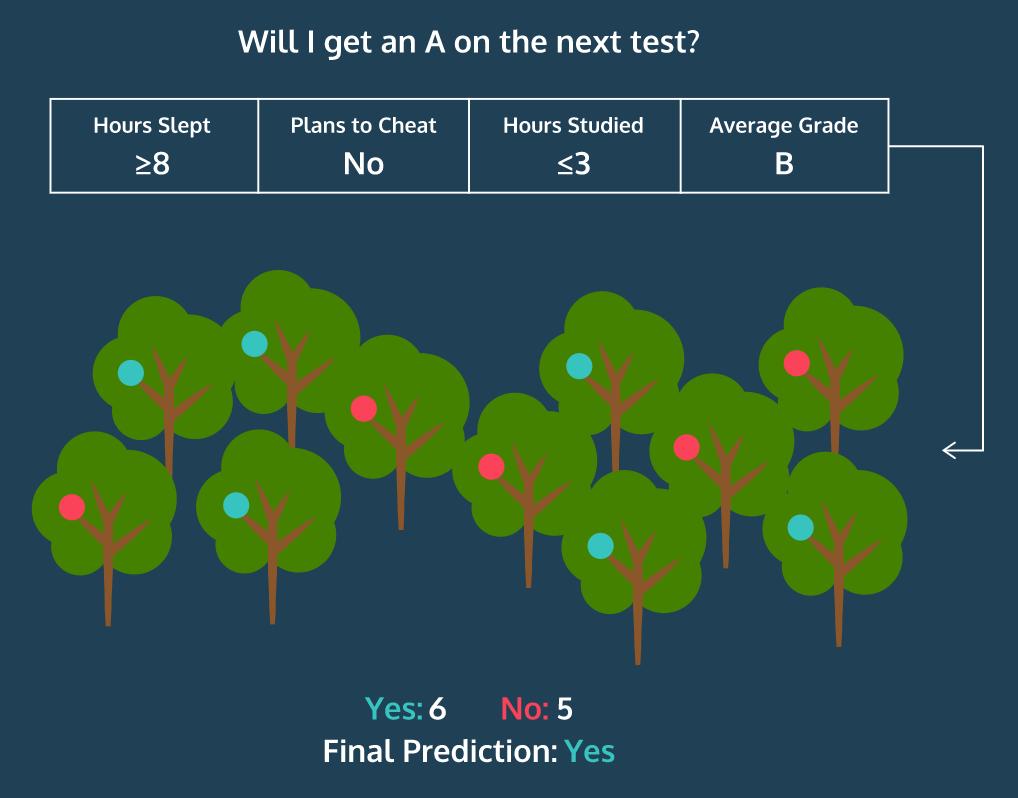

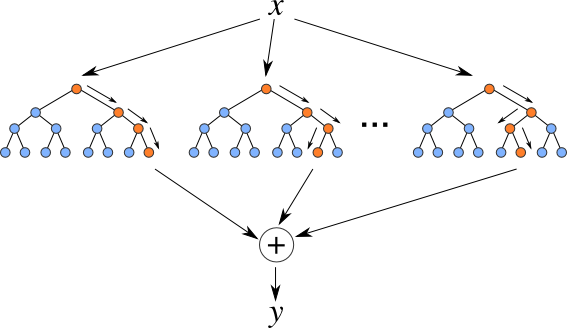

몇몇 나무들에서 오버피팅이 있을 수도 있지만 다수의 나무를 기반으로 예측하기 때문에 그 영향력이 줄어들어 좋은 일반화 성능을 보임 <br>
→ 앙상블(ensemble) 학습법<br>
각 나무들은 배깅(bagging)이라는 프로세스로 만드는데 중복을 허용하여 임으로 학습 데이터 세트를 뽑아 의사결정 트리를 만드는 방법<br>
bagging = bootstrap + aggregate<br>
- Bootstrapping : 전체 집합에서 무작위 복원추출을 통해 여러 부분집합을 만드는 행위<br>
- Aggregating : '집계한다' 는 광범위한 용어로 평균이나 최빈값 등을 도출하는 행위
<br>

ex.<br>
1000개의 행이 있는 가방(bag)에서 임의로 100개 뽑아 첫 번째 트리를 만들고 그 100개의 행은 가방에 도로 집어 넣는다. 그리고 다시 1000개의 행에서 또 임의로 100개를 뽑아 두 번째 트리를 만든 후 다시 가방에 집어 넣는 방식
<br>
Bagging feature은 트리를 만들 때 사용될 속성을 제한함으로써 다양성 보장해야...
<br>
ex. 총 25개의 속성이 있는데, 그 중 5개의 속성만 뽑아서 살펴본 후 그 중 정보 획득량이 가장 높은 걸 기준으로 데이터를 분할하는 거다. 그 다음 단계에서도 다시 임의로 5개만 선택해서 살펴보고...<br>

몇개씩 속성을 뽑는 게 좋을까. 위 예처럼 총 속성이 25개면 5개, 즉 전체 속성 개수의 제곱근만큼 선택하는 게 가장 좋다고, 경험적으로 그렇게 나타난다고 한다.


암튼 14장에서 랜덤 포레스트의 중요 매개 변수 등 구체적인 내용을 Study

--------------------------------------------------------------------------------

### 붙임

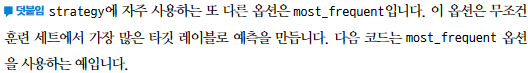

In [ ]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(features_train, target_train)

# 훈련 세트 타깃에서 가장 많은 값으로 예측합니다.
dummy.predict(features_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# 훈련 세트의 타깃 개수를 확인합니다.
np.bincount(target_train)

array([37, 34, 41])

In [ ]:
from collections import Counter
Counter(target_train)

Counter({1: 34, 2: 41, 0: 37})

In [ ]:
import pandas as pd
pd.DataFrame(target_train).value_counts()

2    41
0    37
1    34
dtype: int64

→ 2가 가장 많네...

--------------------------------------------------------------------------------

## 11.4 이진 분류기의 예측 평가

### 모델 성능 평가 : 실제값과 모델에 의해 예측된 값을 비교하여 두 값을 차이(오차)를 구하는 것
- 평가 목적은 과적합을 방지하고 최적 모델을 찾기 위해...
- 성능 평가는 결과변수(답안지)가 있어야 잘한 건지 아닌지 확인할 수 있기 때문에 지도학습에서만 사용
- 모델링 목적, 목표 변수의 유형에 따라 다른 평가지표 사용

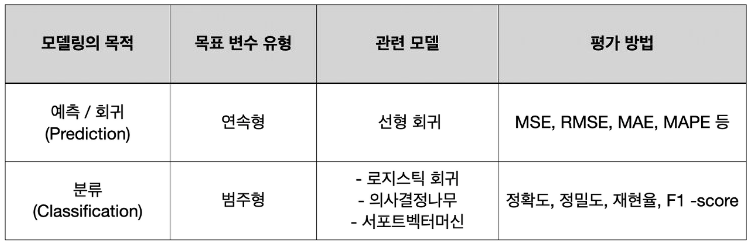

모델을 평가하는 지표<br>
cross_val_score()의 scoring 매개 변수에서 선택<br>
https://scikit-learn.org/stable/modules/model_evaluation.html

평가지표 선택에 대한 가이드가 있는가?<br>
https://sean-parkk.github.io/study/05_%EB%AA%A8%EB%8D%B8%ED%8F%89%EA%B0%80%EC%99%80%EC%84%B1%EB%8A%A5%ED%96%A5%EC%83%81/<br>
https://heung-bae-lee.github.io/2020/01/09/machine_learning_03/

## 모델 평가 지표 선정 예시...

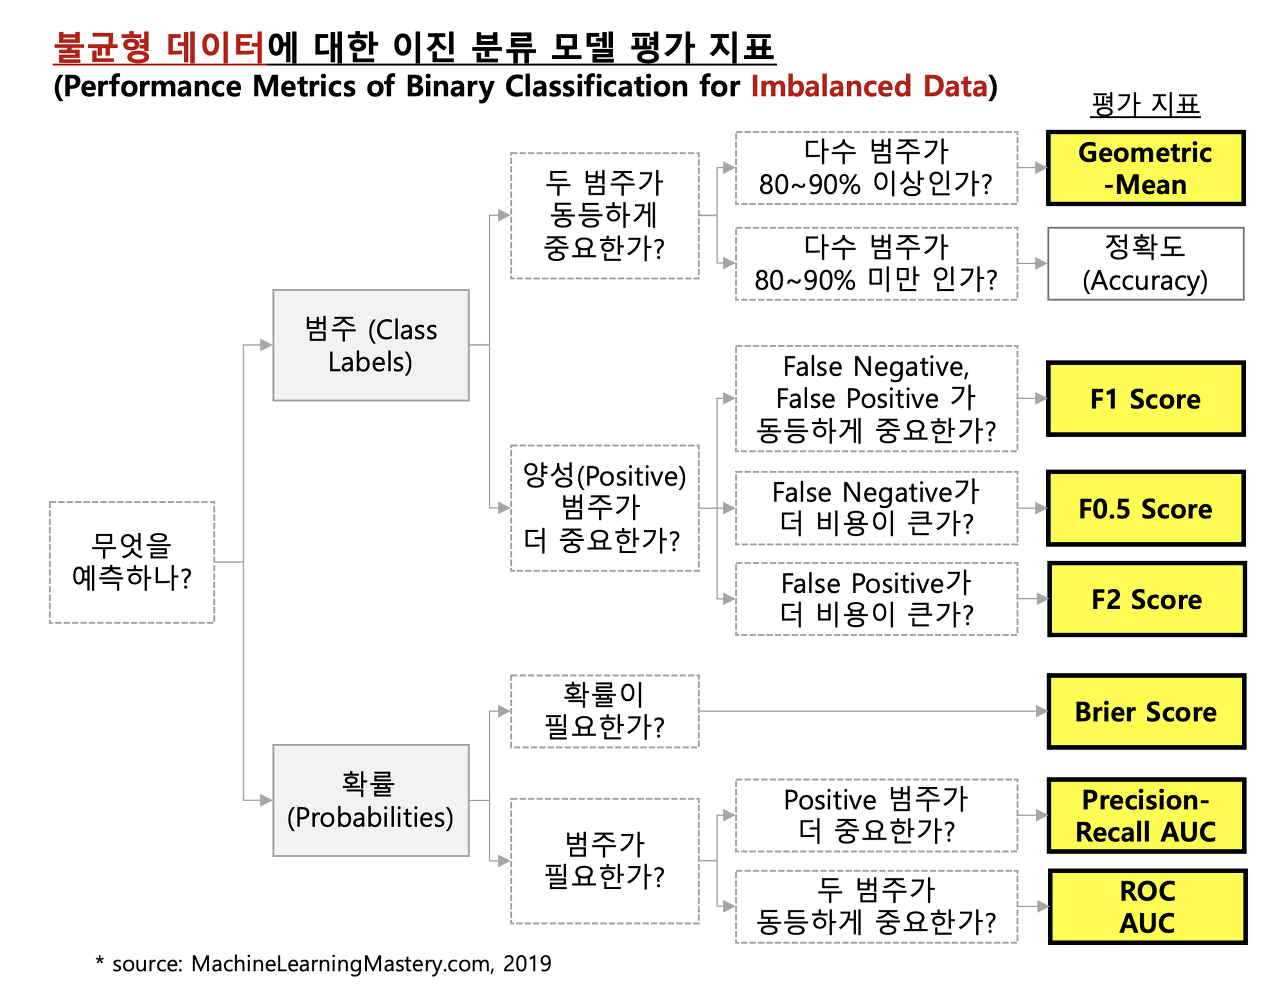

### 오차행렬(Confusion Matrix), 정확도(Accuracy), 정밀도(Precision), 재현율(Recall)

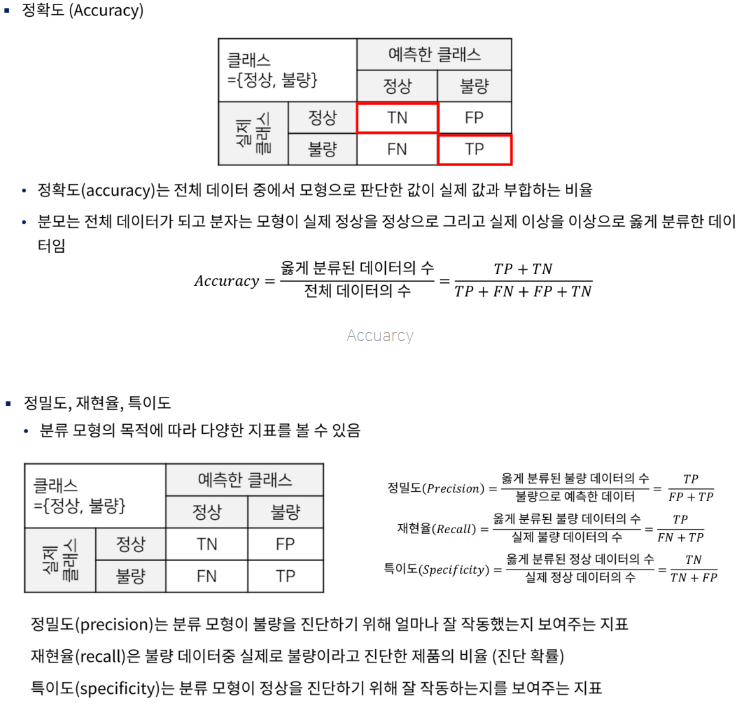

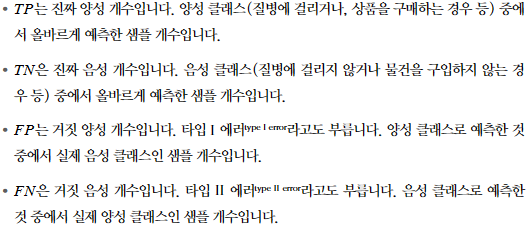

--------------------------------------------------------------------------------

### 실습 : 교재하고 다른 점은 sklearn 버젼이 달라 5 fold 교차 검증이 적용됨

In [ ]:
# 라이브러리를 임포트합니다.
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 특성 행렬과 타깃 벡터를 만듭니다.
X, y = make_classification(n_samples = 10000,
                           n_features = 3,
                           n_informative = 3,
                           n_redundant = 0,
                           n_classes = 2,
                           random_state = 1)

# 로지스틱 회귀 모델을 만듭니다.
logit = LogisticRegression()

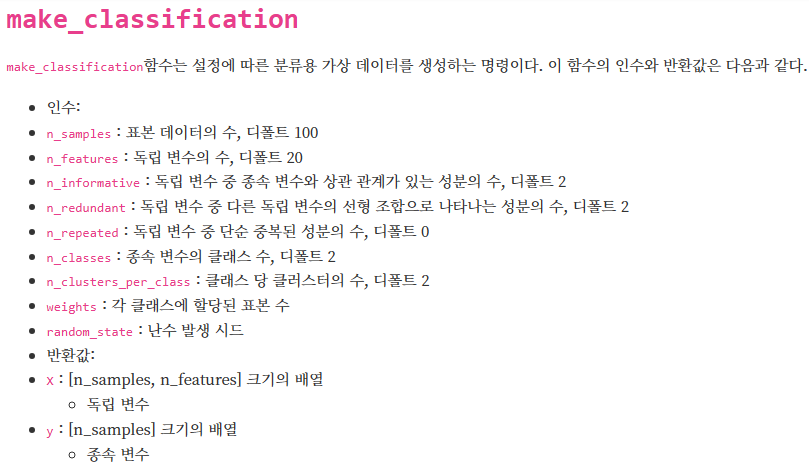

In [ ]:
X.shape

(10000, 3)

In [ ]:
from collections import Counter
Counter(y)

Counter({0: 5000, 1: 5000})

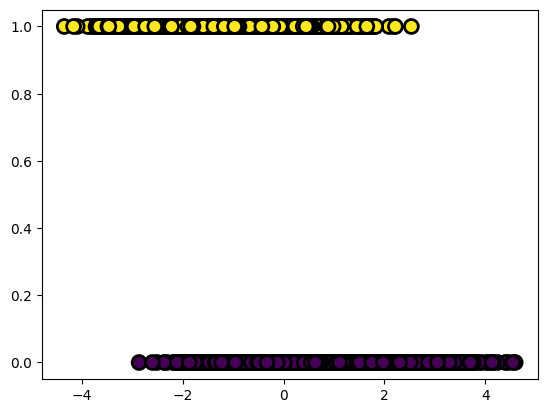

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], y, marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)

<ipython-input-30-6ce66575871a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[:,0][y == 0], label="y=0h")
<ipython-input-30-6ce66575871a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[:,0][y == 1], label="y=1h")


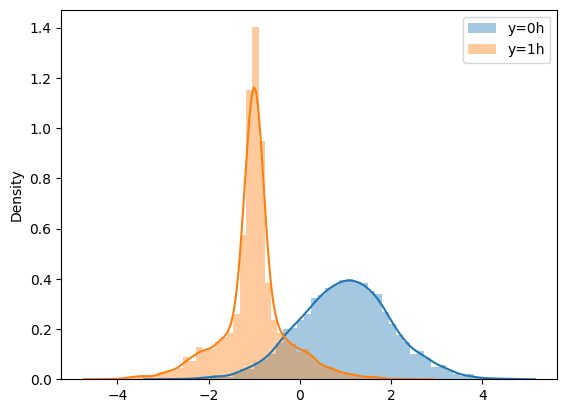

In [ ]:
import seaborn as sns
sns.distplot(X[:,0][y == 0], label="y=0h")
sns.distplot(X[:,0][y == 1], label="y=1h")
plt.legend()
plt.show()

### 정확도(Accuracy) : 전체 데이터 중에, 정확히 예측한 샘플의 비율


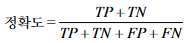

클래스 비율이 불균형한 데이터에서는 적합한 평가지표가 아니다.<br>
정확도는 높지만 예측 성능이 나쁜 역설적인 상황 발생

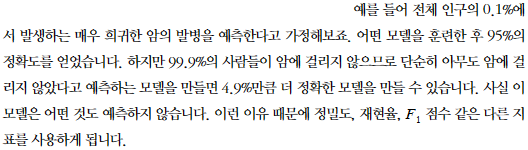

In [ ]:
# 정확도를 사용하여 교차검증을 수행합니다.
cross_val_score(logit, X, y, scoring="accuracy")

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

### 정밀도(Precision) : 양성으로 판단한 것 중 진짜 양성의 비율, 예측에 포함된 잡음
##### 높은 재현율 모델은 샘플을 양성 클래스로 예측하기 위해 양성 판정 기준이 낮음...

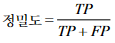

In [ ]:
# 정밀도를 사용한 교차검증
cross_val_score(logit, X, y, scoring="precision")

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

### 재현율(Recall) or 민감도(Sensitivity) : 양성 샘플 중 양성으로 예측한 비율, 양성 샘플을 구분하는 능력

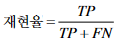

In [ ]:
cross_val_score(logit, X, y, scoring="recall")

array([0.951, 0.952, 0.953, 0.949, 0.951])

### 재현율 : 실제 양성인 데이터 예측을 음성으로 잘못 판단하게 되면 업무 상에 큰 영향이 발생하는 경우 더 중요한 지표
### 정밀도 : 실제 음성인 데이터를 양성으로 잘못 판단하게 되면 업무 상에 큰 영향이 발생하는 경우 더 중요한 지표

### 재현율, 정밀도 모두 TP를 높이는데 초점을 맞추지만,
### 재현율은 FN(실제 Pos한 것을 Neg로 예측)한 것을 낮추는 데,
### 정밀도는 FP를 낮추는 데 초점

### 따라서 이 둘은 서로 보완적인 지표로 분류 성능을 평가하는데 사용되는데
### 한쪽을 높이면 다른 수치는 떨어지기 쉬어져
### Trade-off 관계에 있다고 얘기함

### F1 score : 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 사용(조화평균은 비율에 대한 평균...)

양성 레이블을 가진 샘플을 양성으로 성공적으로 예측한 정도를 측정

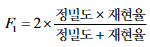

In [ ]:
cross_val_score(logit, X, y, scoring="f1")

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

image.png

--------------------------------------------------------------------------------

#### 교제에서

### cross_val_score를 사용하지 않고 실제 y와 예측 y로 직접 계산 가능

In [ ]:
# 라이브러리를 임포트합니다.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=1)

# 테스트 세트의 예측을 만듭니다.
y_hat = logit.fit(X_train, y_train).predict(X_test)

# 정확도를 계산합니다.
accuracy_score(y_test, y_hat)

0.947

--------------------------------------------------------------------------------

### 붙임

### cross_validate : 다중 평가 지표 사용
cross_val_score()도 cross_validate()를 사용한다고 함

In [ ]:
from sklearn.model_selection import cross_validate

# 정확도와 정밀도를 사용한 교차검증
cross_validate(logit, X, y, scoring=["accuracy", "precision"])

{'fit_time': array([0.02241993, 0.01300502, 0.02984953, 0.01881146, 0.01309657]),
 'score_time': array([0.00460696, 0.00431824, 0.01227498, 0.00437927, 0.00442004]),
 'test_accuracy': array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ]),
 'test_precision': array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])}

scoring 매개변수에 Dict로도 평가지표 전달 가능...<br>
scoring={'acc':'accuracy', 'ra':'roc_auc'},

--------------------------------------------------------------------------------

## 11.5 이진 분류기 임계값 평가하기

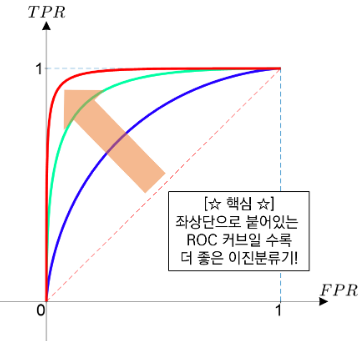

ROC(Receiver Operating Characteristic, 수신자 조작 특성) Curve는 모든 분류<br>
임계값에서 분류 모델의 성능을 보여주는 그래프<br>
- X축 : FPR(False Positive Rate), 거짓 양성 비율<br>
- Y축 : TPR(True Positive Rate), 민감도<br>
- AUC(Area Under Cuve : 그래프 아래 면적)을 이용해 모델 성능 평가<br>

TPR : 민감도 or 재현율, 실제 양성을 얼마나 정확히 분류했는지..., 올바르게 예측된 양성 샘플 수 / 전체 진짜 양성 샘플 수

image.png

FPR : 실제 음성 중 잘못 분류한 비율, 잘못 예측 클래스 개수 / 모든 진짜 음성 클래스 샘플 수

image.png

즉 TPR, FPR은 Positvie 판단에 따른 성공, 실패 여부를 의미<br>
Positve로 예측했는데 True냐 False냐...

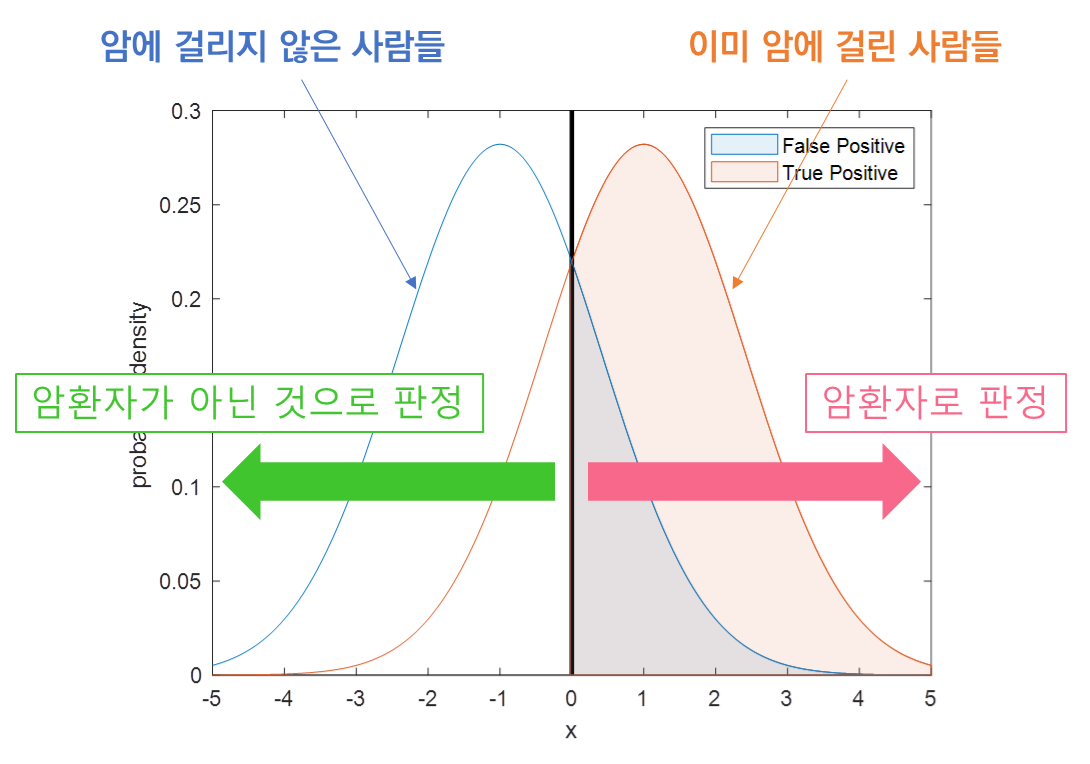

#### 거짓 양성이 회사에 매우 큰 비용을 치르게 한다면 확률 임계값을 크게하는 모델 선호<br>
#### 일부 양성 샘플을 예측하지 못할 수 도 있지만 양성으로 예측된 샘플은 예측이 맞을 것이라는 강한 확신

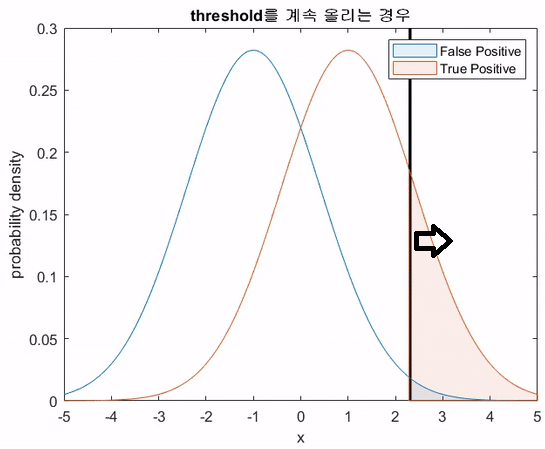

# → 진짜 양성 비율(TPR)과 거짓 양성 비율(FPR) 사이의 Trade-off

## ROC curve에서의 의미 설명 Good<br>
https://angeloyeo.github.io/2020/08/05/ROC.html

In [ ]:
import matplotlib.pyplot as plt

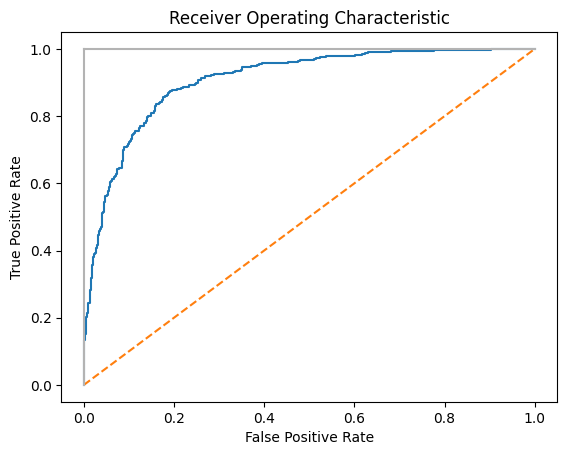

In [ ]:
# 라이브러리를 임포트합니다.
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = make_classification(n_samples=10000,
                                       n_features=10,
                                       n_classes=2,
                                       n_informative=3,
                                       random_state=3)

# 훈련 세트와 테스트 세트로 나눕니다.
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)

# 분류기를 만듭니다.
logit = LogisticRegression()

# 모델을 훈련합니다.
logit.fit(features_train, target_train)

# 예측 확률을 계산합니다.
target_probabilities = logit.predict_proba(features_test)[:,1]

# 진짜 양성 비율과 거짓 양성 비율을 계산합니다.
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

# ROC 곡선을 그립니다.
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### LogisticRegression()의 predict_proba() 메서드는 각 클래스에 소속될 확률을 표시

In [ ]:
# 예측 확률을 계산합니다.
logit.predict_proba(features_test)[0:1]

array([[0.86891533, 0.13108467]])

In [ ]:
logit.classes_

array([0, 1])

음성 클래스 0이 될 확률 ~86.9%<br>
양성 클래스 1이 될 확률 ~13.1%<br>

### Threshod 값에 따른 TPR, FPR
##### 위 사이트 참고

In [ ]:
print("임계값:", threshold[116])
print("진짜 양성 비율:", true_positive_rate[116])
print("거짓 양성 비율:", false_positive_rate[116])

임계값: 0.5331715230155316
진짜 양성 비율: 0.810204081632653
거짓 양성 비율: 0.14901960784313725


In [ ]:
print("임계값:", threshold[45])
print("진짜 양성 비율:", true_positive_rate[45])
print("거짓 양성 비율:", false_positive_rate[45])

임계값: 0.818913387665929
진짜 양성 비율: 0.5448979591836735
거짓 양성 비율: 0.047058823529411764


In [ ]:
# ROC 곡선 아래 면적을 계산합니다.
roc_auc_score(target_test, target_probabilities)

0.9073389355742297

### 붙임

### 정밀도-재현율 곡선

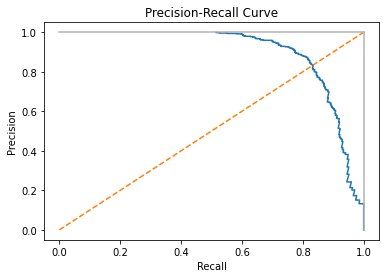

In [ ]:
from sklearn.metrics import precision_recall_curve

# 진짜 양성 비율과 거짓 양성 비율을 계산합니다.
precision, recall, threshold = precision_recall_curve(
    target_test, target_probabilities)

# ROC 곡선을 그립니다.
plt.title("Precision-Recall Curve")
plt.plot(precision, recall)
plt.plot([0, 1], ls="--")
plt.plot([1, 1], c=".7"), plt.plot([1, 1], [1, 0] , c=".7")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()

In [ ]:
from sklearn.metrics import average_precision_score

# 평균 정밀도를 계산합니다.
average_precision_score(target_test, target_probabilities)

0.8984128719848977

### cross_validate로 roc_auc, average_precison 계산

In [ ]:
cross_validate(logit, features, target, scoring=["roc_auc", "average_precision"])

{'fit_time': array([0.02312589, 0.0240562 , 0.02258253, 0.0262146 , 0.02405357]),
 'score_time': array([0.00501823, 0.00465631, 0.00477695, 0.00471449, 0.00475812]),
 'test_roc_auc': array([0.9007689, 0.918251 , 0.90882  , 0.915359 , 0.90261  ]),
 'test_average_precision': array([0.90028629, 0.90967443, 0.90296471, 0.91135611, 0.88797021])}

# **시간되면 정밀도-재현율 곡선과 ROC curve 비교

--------------------------------------------------------------------------------

## 11.6 다중클래스 분류기 예측 평가하기

### 참고 사이트 :
- https://nittaku.tistory.com/295
- https://rython.tistory.com/14
- https://moons08.github.io/datascience/classification_score_basic/
- https://data-minggeul.tistory.com/11

### 클래스 비율이 균형일 때는 정확도는 해석이 용이한 평가 지표
### 정확도 = 올바르게 예측한 수 / 전체 샘플 수
### → 다중 클래스에도 적용 가능

In [ ]:
# 라이브러리를 임포트합니다.
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = make_classification(n_samples = 10000,
                           n_features = 3,
                           n_informative = 3,
                           n_redundant = 0,
                           n_classes = 3,
                           random_state = 1)

# 로지스틱 회귀 모델을 만듭니다.
logit = LogisticRegression()

# 정확도를 사용하여 교차검증을 수행합니다.
cross_val_score(logit, features, target, scoring='accuracy')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

### 앞서 언급한 평가 지표들은 이진 분류를 위해 고안되었지만 <br>
### 훈련데이터를 이진클래스처럼 취급하는 방식으로 다중 클래스 환경에도 적용 가능

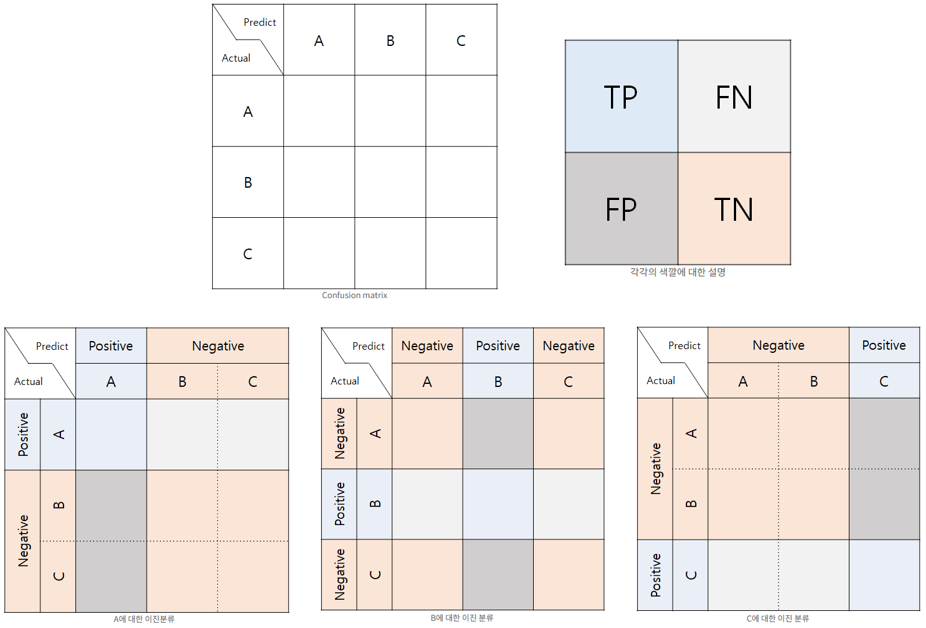

계산 예시

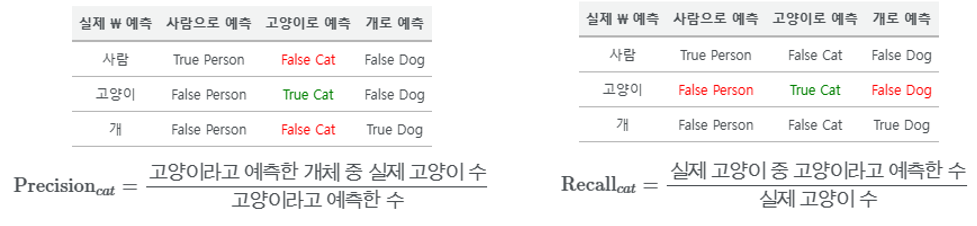

In [ ]:
# 마크로 평균 F1 점수를 사용하여 교차검증을 수행합니다.
cross_val_score(logit, features, target, scoring='f1_macro')

array([0.84061272, 0.82895312, 0.82625661, 0.81515121, 0.81992692])

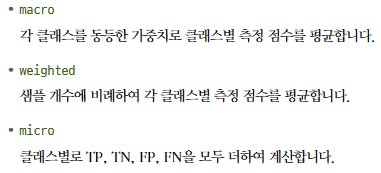

## ※ 참고 Macro Average, Weighted Average, Micro Average

### Macro Average<br>
##### 각 class에 따라 TP, FN, FP, TN 값을 이용해 평가 지표 계산 후 그 값들의 평균 사용

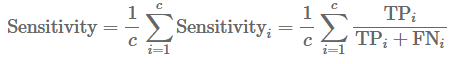

### Weighted Average
##### 각 class에 해당하는 data의 개수에 가중치를 주어 평균

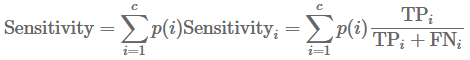

### Micro Average
##### 각각의 TP, FN, FP, TN 값들을 모두 합쳐 계산에 이용

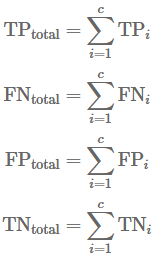

image.png

### ex. f1-score에 대한 Macro, Weighted, Micro

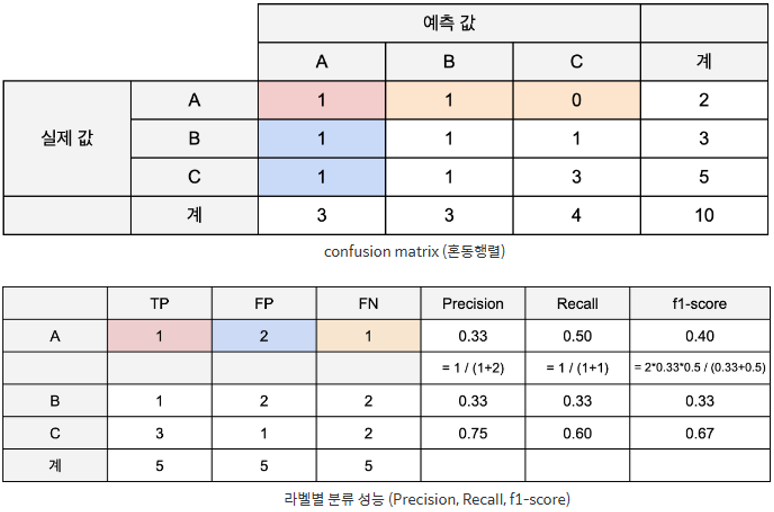

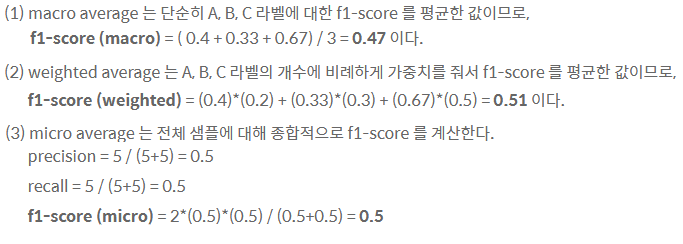

--------------------------------------------------------------------------------

# 그냥 위 내용 복잡하다 싶고 뭘 선택해야하는지 모르겠다 싶으면
# 균형 데이터 일 때 Accrucy
# 불균형 데이터 일 때 f1_score 구하고 Precison, Recall 참고 비교

기타 참고 : G-mean, AIC, BIC, 더 있는 듯...

--------------------------------------------------------------------------------

## 11.7 분류기 성능 시각화하기

### Confusion matrix로 시각화

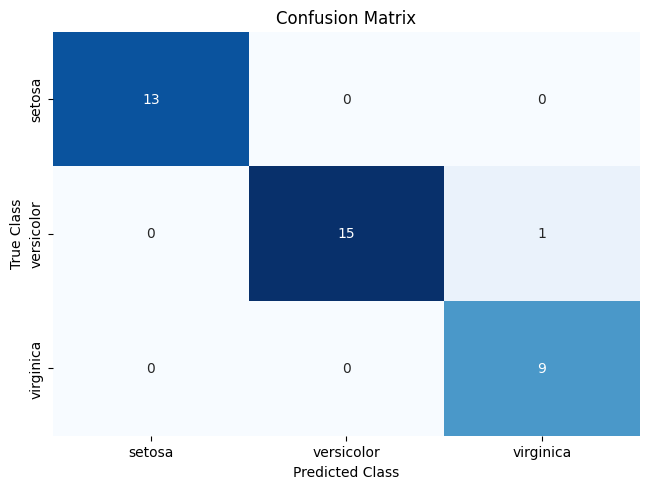

In [ ]:
# 라이브러리를 임포트합니다.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

# 데이터를 로드합니다.
iris = datasets.load_iris()

# 특성 행렬을 만듭니다.
features = iris.data

# 타깃 벡터를 만듭니다.
target = iris.target

# 클래스 이름의 리스트를 만듭니다.
class_names = iris.target_names

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=1)

# 로지스틱 회귀 모델을 만듭니다.
classifier = LogisticRegression(max_iter=1000)

# 모델을 훈련하고 예측 결과를 계산합니다.
target_predicted = classifier.fit(features_train,
    target_train).predict(features_test)

# 오차 행렬을 만듭니다.
matrix = confusion_matrix(target_test, target_predicted)

# 판다스 데이터프레임을 만듭니다.
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# 히트맵을 만듭니다.
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

### 오차 행렬은 해석이 용이
###
- 완벽한 모델은 대각선에만 값이 있고 나머지 0
- 모델이 나쁘다는 것 뿐만아니라 어떻게 나쁜지도 알려줌, 잘못된 분류 패턴 확인(virginica / versicolor vs virginica / setosa)
- 다중 클래스 환경에서도 잘 동작...다만 타깃 벡터 많으면 그래프로 나타내기 어려움

※ sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")<br>
https://seaborn.pydata.org/generated/seaborn.heatmap.html

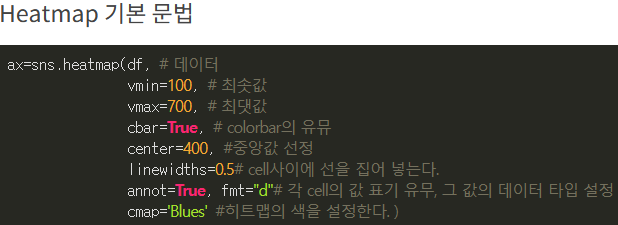

# heatmap은 다른 library로도 그릴 수 있다.
- matplotlib : plt.pcolor(df)
- pandas : df.style.background_gradient(cmap='summer')

### 붙임

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(target_test, target_predicted)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

--------------------------------------------------------------------------------

## 11.8 회귀 모델 평가하기

In [ ]:
# 라이브러리를 임포트합니다.
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = make_regression(n_samples = 100,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 50,
                                   coef = False,
                                   random_state = 1)

# 선형 회귀 모델을 만듭니다.
ols = LinearRegression()

# 음의 MSE를 사용한 교차검증을 수행합니다.
cross_val_score(ols, features, target, scoring='neg_mean_squared_error')

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

In [ ]:
# R^2를 사용한 교차검증을 수행합니다.
cross_val_score(ols, features, target, scoring='r2')

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

### 회귀모델 평가 지표

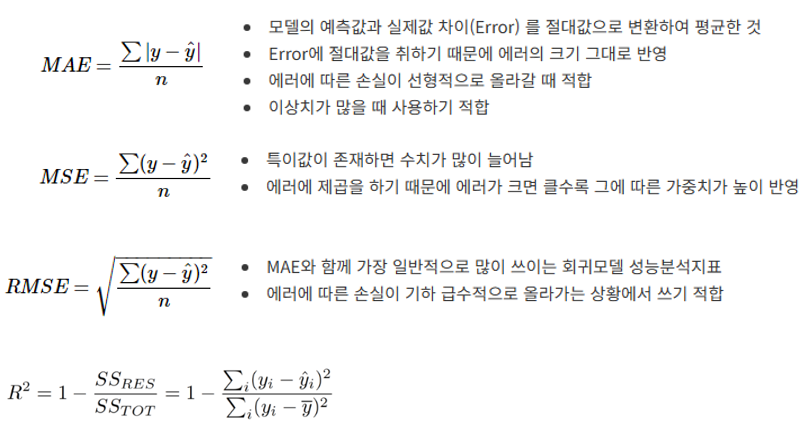

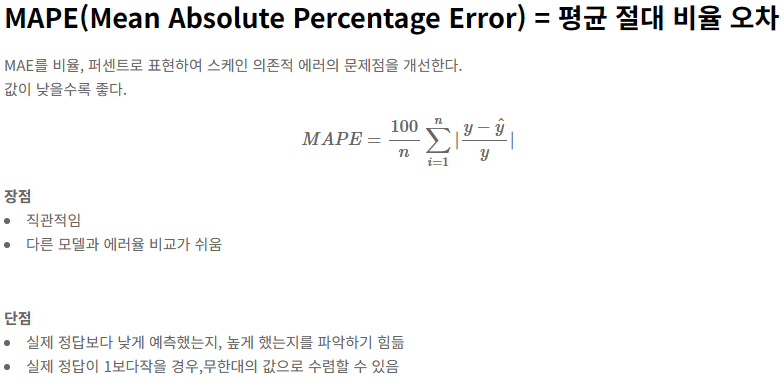

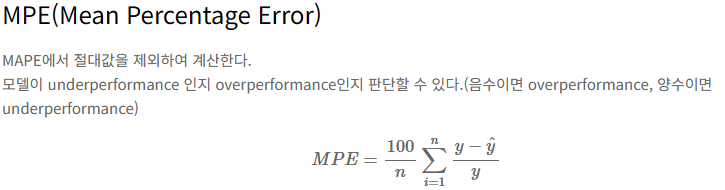

# ★ 사이킷런의 scoring 매개변수값은 비용함수가 아닌 효용함수를 기대함(높은 값이 낮은 값보다 좋아야...), 이에 MSE나 MAE 등 낮은 값이 좋은 지표들은 음수로 변환하여 전달하여야한다.<br>
cf) R_squeare 결정지표는 클수록 좋은 모델...

--------------------------------------------------------------------------------

## 11.9 군집 모델 평가

### 군집분석 : 범주형 타겟 정보가 없는 경우, 전체 데이터를 군집으로 그룹화하여 군집 특징 분석<br>
클러스터링 → 비지도 학습
###Ch. 19에서 다룰 예정

1.계층적 군집화<br>
2.분할적 군집화
- 중심점 기반: K-평균 군집화
- 밀도 기반: DBSCAN
- 확률 기반: 퍼지군집화
- 분포 기반: 기댓값 최대화 알고리즘
- 그래프 기반: 자기조직화지도

간단히...
그룹화를 수행할 때는 주어진 관측값들 사이의 거리 또는 유사성을 이용<br>
동일한 군집에 속하는 데이터는 특징이 서로 비슷하고, 서로 다른 군집에 속한 데이터는 그렇지 않도록 구성

비지도 학습의 특성상 정확하고 절대적인 성능 평가는 어렵지만...

### 얼마나 잘 군집해놓았는지 평가하는 방법 : 실루엣 계수(silhouette coefficients)

개별 데이터가 할당된 군집 내 데이터와 얼마나 가깝게 군집화 되어있는지, 그리고 다른 군집에 있는 데이터와는 얼마나 멀리 분리되어 있는지를 수치로 나타냄<br>
군집이 잘 분리되었다는 것은 동일한 군집 내에서의 데이터는 서로 가깝게 위치해있으며 다른 군집과의 거리는 멈

각 데이터 포인트와 주위 데이터 포인트들과의 거리 계산을 통해 값을 구함

참고 : https://studying-haeung.tistory.com/10

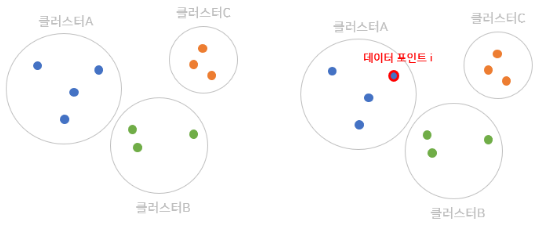

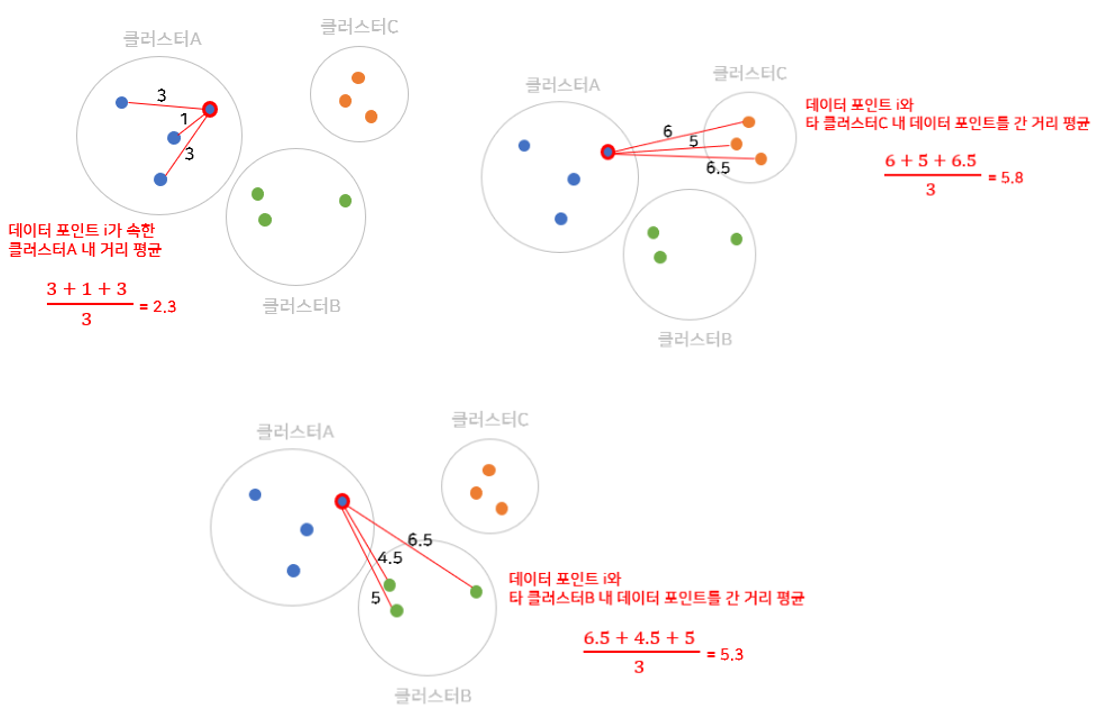

image.png

d(i,B) = 5.8, d(i,C) = 5.3

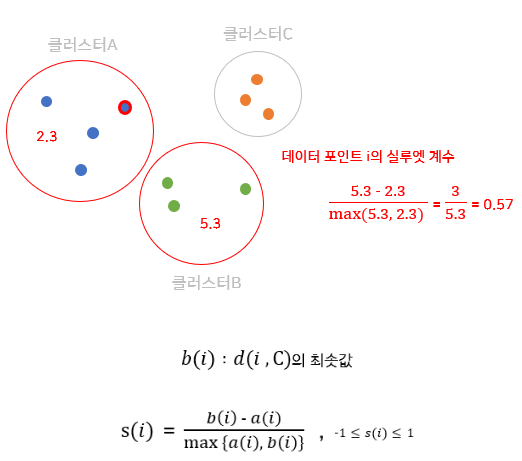

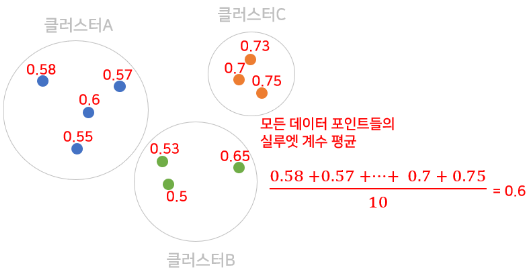

모든 s(i)의 평균 값이 최종 실루엣 계수 : -1 ~ 1

- 실루엣 계수의 평균값이 1에 가까울수록 군집화가 잘 되었다고 생각할 수 있다.(조밀하고 잘 구분)  
- 각 클러스터 내의 데이터 포인트들의 실루엣 계수 평균값을 구하여, 각 클러스터별 평균값도 구할 수 있다. 1에 가까운 평균값을 가지는 클러스터는 'clear-cut' 클러스터, 0에 가까운 값을 가지는 클러스터는 'weak' 클러스터로 표현된다.
- s(i)가 0에 가까운 경우는, 두 군집 간 거리가 거의 비슷한 경우를 의미하며 잘 구분되지 않은 상태이다.
- s(i)가 -1에 가까운 경우는, 데이터 포인트 i가 오히려 이웃 클러스터에 더 가까운 경우를 의미하며 아예 잘못 할당된 상태라고 볼 수 있다. 그래서 이러한 경우는 실제로는 거의 나타나지 않는다.

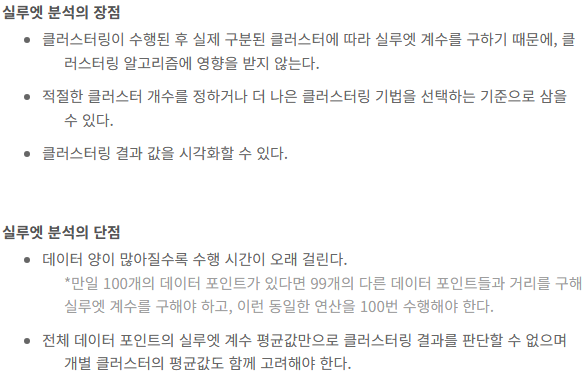

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 특성 행렬을 생성합니다.
features, _ = make_blobs(n_samples = 1000,
                         n_features = 10,
                         centers = 2,
                         cluster_std = 0.5,
                         shuffle = True,
                         random_state = 1)

# k-평균을 사용하여 데이터를 클러스터링하고 클래스를 예측합니다.
model = KMeans(n_clusters=2, random_state=1).fit(features)

# 예측된 클래스
target_predicted = model.labels_

# 모델을 평가합니다.
silhouette_score(features, target_predicted)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.8916265564072141

--------------------------------------------------------------------------------

## 11.10 사용자 정의 평가 지표 만들기

자신만의 측정 지표를 정의하고 싶을 때

### 핵심 : 평가 지표 계산 함수 만들고 make_scorer에 넣고 값이 높은게 좋은지 낮은게 좋은지 설정

In [ ]:
# 라이브러리를 임포트합니다.
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = make_regression(n_samples = 100,
                                   n_features = 3,
                                   random_state = 1)

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split(
     features, target, test_size=0.10, random_state=1)

# 사용자 정의 지표를 만듭니다.
def custom_metric(target_test, target_predicted):
    # R^2 점수를 계산합니다.
    r2 = r2_score(target_test, target_predicted)
    # R^2 점수를 반환합니다.
    return r2

# 높은 점수가 좋은 것을 나타내는 스코어 함수를 만듭니다.
score = make_scorer(custom_metric, greater_is_better=True)

# 릿지(ridge) 회귀 모델을 만듭니다.
classifier = Ridge()

# 릿지 회귀 모델을 훈련합니다.
model = classifier.fit(features_train, target_train)

# 사용자 정의 스코어 함수를 적용합니다.
score(model, features_test, target_test)

0.9997906102882058

In [ ]:
# 예측
target_predicted = model.predict(features_test)

# R^2 점수를 계산합니다.
r2_score(target_test, target_predicted)

0.9997906102882058

--------------------------------------------------------------------------------

## 11.11 훈련 세트 크기에 따른 영향을 시각화하기

### 훈련 세트에 있는 샘플 개수에 따른 영향을 평가하고 싶을 때

### learning_curve는 train_size에 따라 train_score와 test_score를 계산하여 리턴

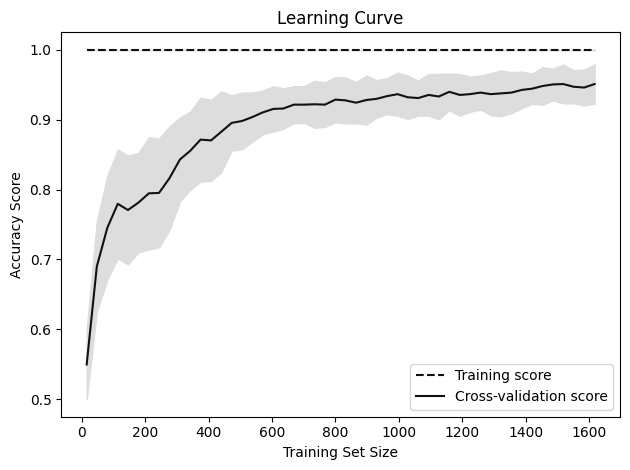

In [ ]:
# 라이브러리를 임포트합니다.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

# 데이터를 로드합니다.
digits = load_digits()

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = digits.data, digits.target

# 다양한 훈련 세트 크기에서 교차검증 훈련 점수와 테스트 점수를 계산합니다.
train_sizes, train_scores, test_scores = learning_curve(# 분류기
                                                        RandomForestClassifier(),
                                                        # 특성 행렬
                                                        features,
                                                        # 타깃 벡터
                                                        target,
                                                        # 폴드 수
                                                        cv=10,
                                                        # 성능 지표
                                                        scoring='accuracy',
                                                        # 모든 코어 사용
                                                        n_jobs=-1,
                                                        # 50개의 훈련 세트 크기
                                                       train_sizes=np.linspace(
                                                       0.01,
                                                       1.0,
                                                       50))

# 훈련 세트 점수의 평균과 표준 편차를 계산합니다.
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# 테스트 세트 점수의 평균과 표준 편차를 계산합니다.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 그래프를 그립니다.
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# 표준 편차 영역을 그립니다.
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, color="#DDDDDD")

# 그래프를 출력합니다.
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
train_sizes

array([  16,   48,   81,  114,  146,  179,  212,  244,  277,  310,  342,
        375,  408,  440,  473,  506,  538,  571,  604,  636,  669,  702,
        734,  767,  800,  832,  865,  898,  930,  963,  996, 1028, 1061,
       1094, 1126, 1159, 1192, 1224, 1257, 1290, 1322, 1355, 1388, 1420,
       1453, 1486, 1518, 1551, 1584, 1617])

In [ ]:
target.shape

(1797,)

--------------------------------------------------------------------------------

## 11.12 평가 지표 리포트 만들기

예측값과 타깃값을 classification_report에 적용한다

In [ ]:
# 라이브러리를 임포트합니다.
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 데이터를 로드합니다.
iris = datasets.load_iris()

# 특성 행렬을 만듭니다.
features = iris.data

# 타깃 벡터를 만듭니다.
target = iris.target

# 타깃 클래스 이름의 리스트를 만듭니다.
class_names = iris.target_names

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=1)

# 로지스틱 회귀 모델을 만듭니다.
classifier = LogisticRegression(max_iter=1000)

# 모델을 훈련하고 예측을 만듭니다.
model = classifier.fit(features_train, target_train)
target_predicted = model.predict(features_test)

# 분류 리포트를 만듭니다.
print(classification_report(target_test,
                            target_predicted,
                            target_names=class_names)) # ['1','2','3']))#

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



#### support는 실제 샘플 개수

In [ ]:
from collections import Counter
Counter(target_test)

Counter({0: 13, 1: 16, 2: 9})

In [ ]:
Counter(target_predicted)

Counter({0: 13, 1: 15, 2: 10})

### 붙임

In [ ]:
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# 분류 리포트를 만듭니다.
print(classification_report(target_test,
                            target_predicted,
                            labels=[0,1,2,3],
                            zero_division='warn'))  # 교재는 0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9
           3       0.00      0.00      0.00         0

   micro avg       0.97      0.97      0.97        38
   macro avg       0.72      0.73      0.73        38
weighted avg       0.98      0.97      0.97        38



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

# ※ Logistic Regressor는 classifer
max_iter는 해를 찾아가는 데 있어서 반복 횟수를 제한하는 것<br>
이외, C, solver, penalty, class_weight 사용할 때 확인 필요
L1, L2 제약 조건, cost function 등...
### Ch. 16에서 다룰 예정

--------------------------------------------------------------------------------

## 11.13 하이퍼파라미터 값의 영향을 시각화하기

### 하이퍼파라미터 값에 따른 모델의 성능 변화 확인 방법
### 앞서 learning curve로 학습 샘플 수에 따른 성능 확인 방법을 배웠음

### 핵심 내용은 validation_curve의 매개변수 param_name과 param_range에 변화시키고자 하는 파라미터를 세팅

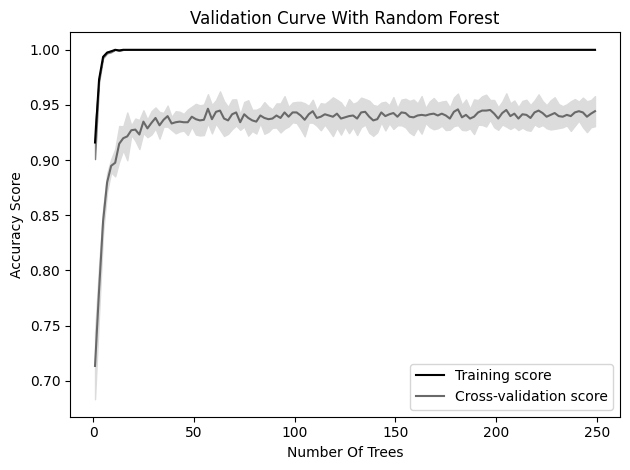

In [ ]:
# 라이브러리를 임포트합니다.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

# 데이터를 로드합니다.
digits = load_digits()

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = digits.data, digits.target

# 파라미터 값의 범위를 만듭니다.
param_range = np.arange(1, 250, 2)

# 파라미터 값의 범위를 사용하여 훈련 세트와 테스트 세트의 정확도를 계산합니다.
train_scores, test_scores = validation_curve(
    # 분류기
    RandomForestClassifier(),
    # 특성 행렬
    features,
    # 타깃 벡터
    target,
    # 조사할 하이퍼파라미터
    param_name="n_estimators",
    # 하이퍼파라미터 값의 범위
    param_range=param_range,
    # 폴드 수
    cv=3,
    # 성능 지표
    scoring="accuracy",
    # 모든 코어 사용
    n_jobs=-1)

# 훈련 세트 점수의 평균과 표준 편차를 계산합니다.
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# 테스트 세트 점수의 평균과 표준 편차를 계산합니다.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 훈련 세트와 테스트 세트의 평균 정확도 점수를 그래프로 그립니다.
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# 훈련 세트와 테스트 세트의 정확도에 대한 표준 편차를 그래프로 그립니다.
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, color="gainsboro")

# 그래프를 출력합니다.
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()